In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("avalan.xlsx")

In [3]:
dataset

,month,snow depth,humidity,temperature,windspeed,avalanche occurance
0,march,10,72,35,65,yes
1,april,9,66,37,66,yes
2,june,8,64,39,65,yes
3,may,7,66,41,66,yes
4,march,6,70,35,65,yes
5,april,4,74,36,65,yes
6,may,5,70,38,66,yes
7,june,2,23,25,22,No
8,march,3,25,28,23,No
9,may,1,26,43,25,yes


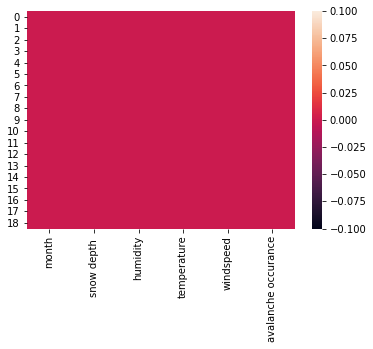

In [4]:
sns.heatmap(dataset.isnull())

In [5]:
dataset.isnull().any()

month                  False
snow depth             False
humidity               False
temperature            False
windspeed              False
avalanche occurance    False
dtype: bool

In [6]:
dataset.describe()

,snow depth,humidity,temperature,windspeed
count,19.000000,19.000000,19.000000,19.000000
mean,5.473684,60.473684,38.421053,54.684211
std,3.097820,22.942848,5.347022,18.874005
min,1.000000,23.000000,25.000000,22.000000
25%,3.000000,43.500000,36.500000,46.000000
50%,5.000000,70.000000,38.000000,65.000000
75%,8.500000,74.000000,42.500000,66.000000
max,10.000000,92.000000,45.000000,67.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                19 non-null     object
 1   snow depth           19 non-null     int64 
 2   humidity             19 non-null     int64 
 3   temperature          19 non-null     int64 
 4   windspeed            19 non-null     int64 
 5   avalanche occurance  19 non-null     object
dtypes: int64(4), object(2)
memory usage: 824.0+ bytes


In [8]:
dataset["month"].unique()

array(['march', 'april', 'june', 'may', 'february', 'febraury'],
      dtype=object)

In [9]:
dataset["avalanche occurance"].unique()

array(['yes', 'No'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
dataset["month"] = le.fit_transform(dataset["month"])
dataset["avalanche occurance"]=le.fit_transform(dataset["avalanche occurance"])

In [11]:
dataset.head()

,month,snow depth,humidity,temperature,windspeed,avalanche occurance
0,4,10,72,35,65,1
1,0,9,66,37,66,1
2,3,8,64,39,65,1
3,5,7,66,41,66,1
4,4,6,70,35,65,1


In [12]:
x = dataset.iloc[:,0:5].values
y = dataset.iloc[:,5:6].values

In [13]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(categorical_features = [0])
x = one.fit_transform(x).toarray()

C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
x

array([[ 0.,  0.,  0.,  0.,  1.,  0., 10., 72., 35., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  9., 66., 37., 66.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  8., 64., 39., 65.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  7., 66., 41., 66.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  6., 70., 35., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  4., 74., 36., 65.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  5., 70., 38., 66.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  2., 23., 25., 22.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  3., 25., 28., 23.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1., 26., 43., 25.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  7., 92., 42., 65.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  4., 74., 40., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  9., 80., 44., 66.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  3., 60., 38., 66.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  2., 24., 37., 27.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1., 27., 45., 23.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  4., 84., 45., 67.

In [15]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z = oh.fit_transform(x[:,0:1]).toarray()
x = np.delete(x,0,axis = 1)
x = np.concatenate((z,x),axis = 1)

C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [16]:
x

array([[ 1.,  0.,  0.,  0.,  0.,  1.,  0., 10., 72., 35., 65.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 66., 37., 66.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  8., 64., 39., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 66., 41., 66.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  6., 70., 35., 65.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 74., 36., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 70., 38., 66.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  2., 23., 25., 22.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  3., 25., 28., 23.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 26., 43., 25.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  7., 92., 42., 65.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  4., 74., 40., 65.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 80., 44., 66.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  3., 60., 38., 66.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  2., 24., 37., 27.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import standardscaler
sc = standardscaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

ImportError: cannot import name 'standardscaler' from 'sklearn.preprocessing' (C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [19]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logistic.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score
logacc = accuracy_score(y_test,y_pred)
logacc

1.0

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[4]], dtype=int64)

In [23]:
from sklearn import metrics
fpr,tpr,threshold, = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\vijay-pc\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


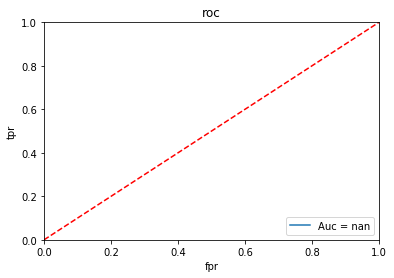

In [25]:
plt.title("roc")
plt.plot(fpr,tpr,label = 'Auc = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()